# **Campo eléctrico**
1.Elaborar un programa para calcular el campo eléctrico producido por un dipolo eléctrico, realizar una representación del campo para todo el dominio elegido para calcular el campo. Para encontrar el campo, se sugiere hacer lo siguiente:



*   a. Encontrar el campo en un punto producido por dos cargas q1 y q2
*   b. Emplee el comando plt.quiver(x, y, Ex, Ey) para mostrar el campo producido por q1 y q2. Puedes intentarlo con el comando, plt.stremplot.
*   c. Generalice el problema para varios puntos en el espacio.

Se recomienda emplear numpy array.





Carga q1


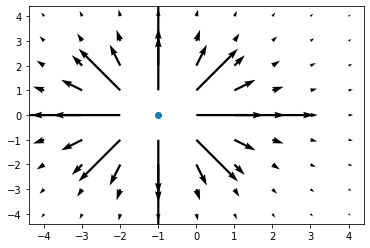



Carga q2


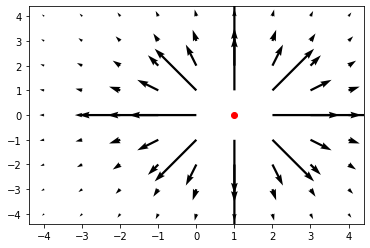



Campo de q1 y q2 combinados


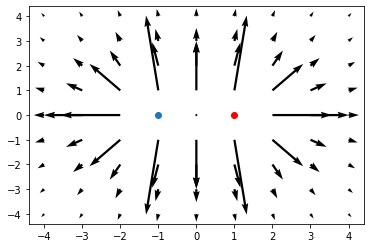

In [1]:
import numpy as np
import matplotlib.pyplot as plt

r_f1 = {"q1":np.array([-1.,0.])}
r_f2 = {"q2":np.array([1.,0.])}

k=1

def campo_electrico(q,r):

    global k

    return k*q/r**2

def campo_fuente(r_f,r_p):

    Delta_R = r_p - r_f
    MagDelta_R = np.sqrt(Delta_R[0] ** 2 + Delta_R[1] ** 2)

    if MagDelta_R !=0:

        u_r = Delta_R / MagDelta_R

        E = campo_electrico(1,MagDelta_R)*u_r
        Ex = E[0]
        Ey = E[1]

        return Ex,Ey

    else:
        pass

x = np.arange(-4, 5, 1)
n1 = len(x)
y = np.arange(-4, 5, 1)
n2 = len(y)

rp = np.zeros((n1*n2, 2))

k = 0

for x_ in x:
    for y_ in y:

        rp[k] = np.array([x_, y_])

        k += 1

E1 = np.zeros((n1*n2,2))
E2 = np.zeros((n1*n2,2))

for i in range (0,len(rp)):

    E1[i] = campo_fuente(r_f1["q1"], rp[i])
    E2[i] = campo_fuente(r_f2["q2"],rp[i])

Et = E1 + E2

print ("Carga q1")
plt.quiver(rp[:,0],rp[:,1],E1[:,0],E1[:,1])
plt.plot(r_f1["q1"][0],r_f1["q1"][1],"o")
plt.show()

print ("\n")

print ("Carga q2")
plt.quiver(rp[:,0],rp[:,1],E2[:,0],E2[:,1])
plt.plot(r_f2["q2"][0],r_f2["q2"][1],"or")
plt.show()

print ("\n")

print ("Campo de q1 y q2 combinados")
plt.quiver(rp[:,0],rp[:,1],Et[:,0],Et[:,1])
plt.plot(r_f1["q1"][0],r_f1["q1"][1],"o")
plt.plot(r_f2["q2"][0],r_f2["q2"][1],"or")
plt.show()

# **Movimiento parabólico.**

1.Un jugador de baloncesto desea saber si encestará su tiro dependiendo de la velocidad inicial, ángulo de lanzamiento y posición respecto a la canasta.
Elabore un programa en el que dada una distancia, velocidad inicial y ángulo, determine si hay cesta. El modelo será bajo partícula, sin la rotación del balón.

Se recomienda emplear numpy array.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

altura_canasta = float(input("Altura de la canasta:"))
dcanasta = float(input("Distancia de la canansta:"))
v0 = float(input("Velocidad inicial:"))
alpha = float(input("angulo de lanzamiento:"))
print ("\n")
radio_canasta = 0.3
alphaRad = alpha*np.pi/180
g = 9.8


#Descomponer la velcidad dada.

vx = v0*np.cos(alphaRad) 
vy = v0*np.sin(alphaRad)

#posición en los ejes x y y

def y_dependiente_x(x): #Da la posición de y dado un x

  y = x*np.tan(alphaRad) - 0.5*g*(x/v0*np.cos(alphaRad))**2

  return y



x = np.linspace(0,dcanasta+1,100)
y = y_dependiente_x(x) 

if y_dependiente_x(dcanasta-0.1)>altura_canasta: #Eliminar el caso donde le balon entra por debajo.
  
  if y_dependiente_x(dcanasta)-altura_canasta<radio_canasta:
    print("¡CESTA!")
  else: print("¡FALLO!")

else: print("¡FALLO!")


plt.figure()
plt.plot(x,y)
plt.plot((dcanasta-radio_canasta,dcanasta+radio_canasta),(altura_canasta,altura_canasta))
plt.grid()
plt.show()


